# Spring 2019 Statistical NLP, UCSD
Programming Assignment 2: Text Classification <br>


In [17]:
import sentiment as sentimentinterface
import classify 
import timeit
import numpy as np

import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
%matplotlib inline

## 1. Inspect the Feature representation

In [2]:
print("Reading data")
tarfname = "data/sentiment.tar.gz"
sentiment = sentimentinterface.read_files(tarfname)
    

Reading data
-- train data
sentiment/train.tsv
4582
-- dev data
sentiment/dev.tsv
458
-- transforming data and labels


In [43]:
array = sentiment.trainX # the vocabulary dictionary and return term-document matrix
print(sentiment.train_data[0]) # the first entry in training data
X = sentiment.trainX # term-document matrix; 
#print(X.toarray().shape) #X : array, [n_samples, n_features]
print('~'*50)
print(sentiment.count_vect.inverse_transform(X)[0]) # Return terms with nonzero entries in X[0].
X_arr = X.toarray()
#print(X)
print(X_arr[0], X[0])
# X_arr is [0,0,0,1,0,1,2,0] where length is number of features(words) so 0 means that 
# feature(word) appears in that sentence 0 times 
print(X_arr[0].shape)

Went last night for the first time with my boyfriend. Let me start off by saying I'm vegetarian, but my boyfriend is not. I ordered the chicken v mushroom, it
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['boyfriend' 'but' 'by' 'chicken' 'first' 'for' 'is' 'it' 'last' 'let'
 'me' 'mushroom' 'my' 'night' 'not' 'off' 'ordered' 'saying' 'start' 'the'
 'time' 'vegetarian' 'went' 'with']
[0 0 0 ... 0 0 0]   (0, 1266)	2
  (0, 1452)	1
  (0, 1470)	1
  (0, 1791)	1
  (0, 3468)	1
  (0, 3581)	1
  (0, 4653)	1
  (0, 4665)	1
  (0, 4997)	1
  (0, 5090)	1
  (0, 5487)	1
  (0, 5810)	1
  (0, 5821)	2
  (0, 5927)	1
  (0, 5981)	1
  (0, 6057)	1
  (0, 6150)	1
  (0, 7572)	1
  (0, 8278)	1
  (0, 8764)	2
  (0, 8864)	1
  (0, 9333)	1
  (0, 9592)	1
  (0, 9689)	1
(9882,)


In [4]:
print((sentiment.count_vect.get_feature_names()[6150])) # map id to word
print((sentiment.count_vect.get_feature_names()[1791]))


ordered
chicken


# 2. Inspect the label representation

In [5]:
print('target labels ', sentiment.target_labels)
print('target labels ', sentiment.trainy[:5]) # show the labels of the first 5 training examples
print(list(sentiment.le.classes_))
print(list(sentiment.le.transform(['NEGATIVE', 'POSITIVE'])))
print(list(sentiment.le.inverse_transform(list(sentiment.trainy[:5]))))


target labels  ['NEGATIVE' 'POSITIVE']
target labels  [1 1 0 0 1]
['NEGATIVE', 'POSITIVE']
[0, 1]
['POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE']


# 3. Take a look at the data

Got there on a Saturday night around 6:50pm We were seated right away. Heather was our server. She was amazing! The food was great. I had the filet and it


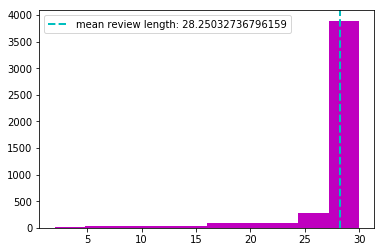

In [67]:
print(sentiment.train_data[31])

lens = []
# histogram of sentence length
for review in sentiment.train_data:
    lens.append(len(review.split()))
plt.hist(lens, color='m')
plt.axvline(np.mean(lens), color='c', linestyle='dashed', linewidth=2,label='mean review length: '+str(np.mean(lens)))
plt.legend()
plt.show()

# 4. Train the classifier

In [7]:
cls = classify.train_classifier(sentiment.trainX, sentiment.trainy)

# 5. What are the decisive features

In [60]:
coefficients=cls.coef_[0]
print(cls.classes_)
print(cls.coef_)
print(cls.coef_.shape)
k = 20
# get top_k positive coefficients -> positive coefficients tends to make prediction positive 
# -> meaning positive features(words)
top_k =np.argsort(coefficients)[-k:]
top_k_words = []

print('-'*50)
print('Top k=%d' %k)
print('-'*50)

for i in top_k:
    print(sentiment.count_vect.get_feature_names()[i])
    top_k_words.append(sentiment.count_vect.get_feature_names()[i])
#print(sentiment.count_ve
print('-'*50)
print('Bottom k=%d' %k)
print('-'*50)
#top_k = np.argpartition(coefficients, -k)[-k:]
bottom_k =np.argsort(coefficients)[:k]
bottom_k_words = []
#print(top_k)
for i in bottom_k:
    print(sentiment.count_vect.get_feature_names()[i])
    bottom_k_words.append(sentiment.count_vect.get_feature_names()[i])

#print(sentiment.count_ve

[0 1]
[[-0.4699021  -0.14974475 -0.01504293 ... -0.18610622 -0.18610622
  -0.18610622]]
(1, 9882)
--------------------------------------------------
Top k=20
--------------------------------------------------
professional
courteous
quickly
important
friendly
style
lucky
love
pleased
spot
montreal
favorite
perfect
best
great
easy
awesome
delicious
amazing
excellent
--------------------------------------------------
Bottom k=20
--------------------------------------------------
worst
horrible
terrible
disappointing
average
meh
excited
overpriced
bland
rude
seems
rather
instead
disappointment
hopes
disappointed
dirty
tasted
awful
weeks


# 6. How is the classifier doing edge cases

## 6 a) reviews that contain top-k words
 in this case we expect predictions to be mostly POSITIVE (i.e LABEL=1)


  Accuracy on these reviews  is: 0.8366013071895425
(153, 2)


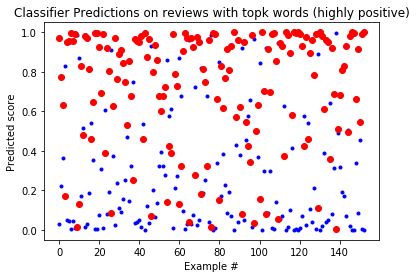

In [61]:
top_k_reviews = []
top_k_labels = []
for j in range(len(sentiment.dev_data)):
    # check if top_k_words (positive words) are in this sentence
    review = sentiment.dev_data[j]
    for word in top_k_words:
        if word in review:
            top_k_reviews.append(review)
            top_k_labels.append(sentiment.dev_labels[j])
            break
    
        #print(review)
dev_X = sentiment.count_vect.transform(top_k_reviews)
classify.evaluate(dev_X, sentiment.le.transform(top_k_labels), cls, 'these reviews')

# estimate the accuracy of data with top_k positive words  
# Probability estimates:
yp = cls.predict_proba(dev_X) 
# [n_samples, n_classes]
print(yp.shape)
plt.plot(yp[:,0],'b.') # ['0: NEGATIVE', '1:POSITIVE'] 
plt.plot(yp[:,1],'ro') 
plt.title('Classifier Predictions on reviews with topk words (highly positive)')
plt.ylabel('Predicted score')
plt.xlabel('Example #')
plt.show()

## 6b) reviews that contain bottom-k words
 in this case we expect predictions to be mostly NEGATIVE (i.e LABEL=0)

  Accuracy on these reviews  is: 0.9473684210526315
[29 30 20 15 34 18 11 32 16 27  2  7 35 36 21  6 13 37  0 33 22  3 26 10
  8  4 24 23  1  9 12 14 31  5 19 28 25 17]


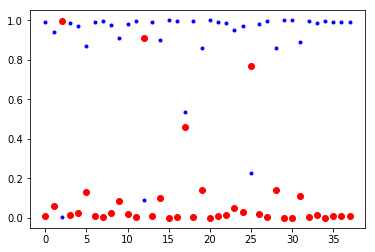

In [53]:
bottom_k_reviews = []
bottom_k_labels = []
for j in range(len(sentiment.dev_data)):
    review = sentiment.dev_data[j]
    for word in bottom_k_words:
        if word in review:
            bottom_k_reviews.append(review)
            bottom_k_labels.append(sentiment.dev_labels[j])
            break
    
        #print(review)
dev_X = sentiment.count_vect.transform(bottom_k_reviews)
classify.evaluate(dev_X, sentiment.le.transform(bottom_k_labels), cls, 'these reviews')
yp = cls.predict_proba(dev_X) 
diff = abs(yp[:,0] - yp[:,1])
print(np.argsort(-diff))
#print(yp.shape)
plt.plot(yp[:,0],'b.') # ['0: NEGATIVE', '1:POSITIVE'] 
plt.plot(yp[:,1],'ro') 
plt.show()

# Feature engineering - Tuning

In [11]:
# original accuracy 
classify.evaluate(sentiment.trainX, sentiment.trainy, cls, 'training')
classify.evaluate(sentiment.devX, sentiment.devy, cls, 'dev')

  Accuracy on training  is: 0.9821038847664775
  Accuracy on dev  is: 0.777292576419214


In [30]:
k = 4700
top_k =np.argsort(coefficients)[-k:]
bad_words = []
bottom_k =np.argsort(coefficients)[:k]
for i in range(len(sentiment.count_vect.get_feature_names())):
    if i in top_k or i in bottom_k:
        continue
    else:
        bad_words.append(sentiment.count_vect.get_feature_names()[i])
print(bad_words)

['10pm', '1oak', '32am', '43', '5min', '99', 'abolutely', 'accepting', 'accompanies', 'accordion', 'activate', 'adam', 'advantage', 'affordably', 'afternoon', 'afterschool', 'albuquerque', 'allergist', 'allowing', 'amongs', 'anti', 'anyday', 'appaled', 'appreciates', 'appreciation', 'arugula', 'asshole', 'at10', 'atb', 'audition', 'bacchus', 'bachelor', 'backyard', 'bald', 'barbeque', 'barstow', 'bartolotta', 'baseboard', 'basis', 'bass', 'basted', 'battered', 'bday', 'bear', 'beautifully', 'beginning', 'belgians', 'belt', 'billing', 'biscuit', 'blander', 'blowing', 'blurry', 'boca', 'bogus', 'bologna', 'booker', 'booze', 'boulud', 'briana', 'brie', 'brownish', 'bruchetta', 'brush', 'brussel', 'brûlée', 'bucco', 'buffalo', 'busboy', 'bushes', 'buyer', 'calcium', 'canard', 'carlitos', 'carries', 'carrot', 'castro', 'celebrating', 'cemented', 'certificate', 'certificates', 'certified', 'chainbreaker', 'chairs', 'charger', 'chilly', 'chimichuri', 'church', 'churro', 'cigarettes', 'classif